In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sp

In [61]:
df = pd.read_csv('NEET_2024_RESULTS.csv')
print(df['marks'].mean())
df

217.15717965642574


,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
...,...,...,...,...,...,...
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333116,4613120136,102,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333117,4613120137,14,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333118,4613120138,179,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


The number of outliers in the 'marks' feature is: 27183


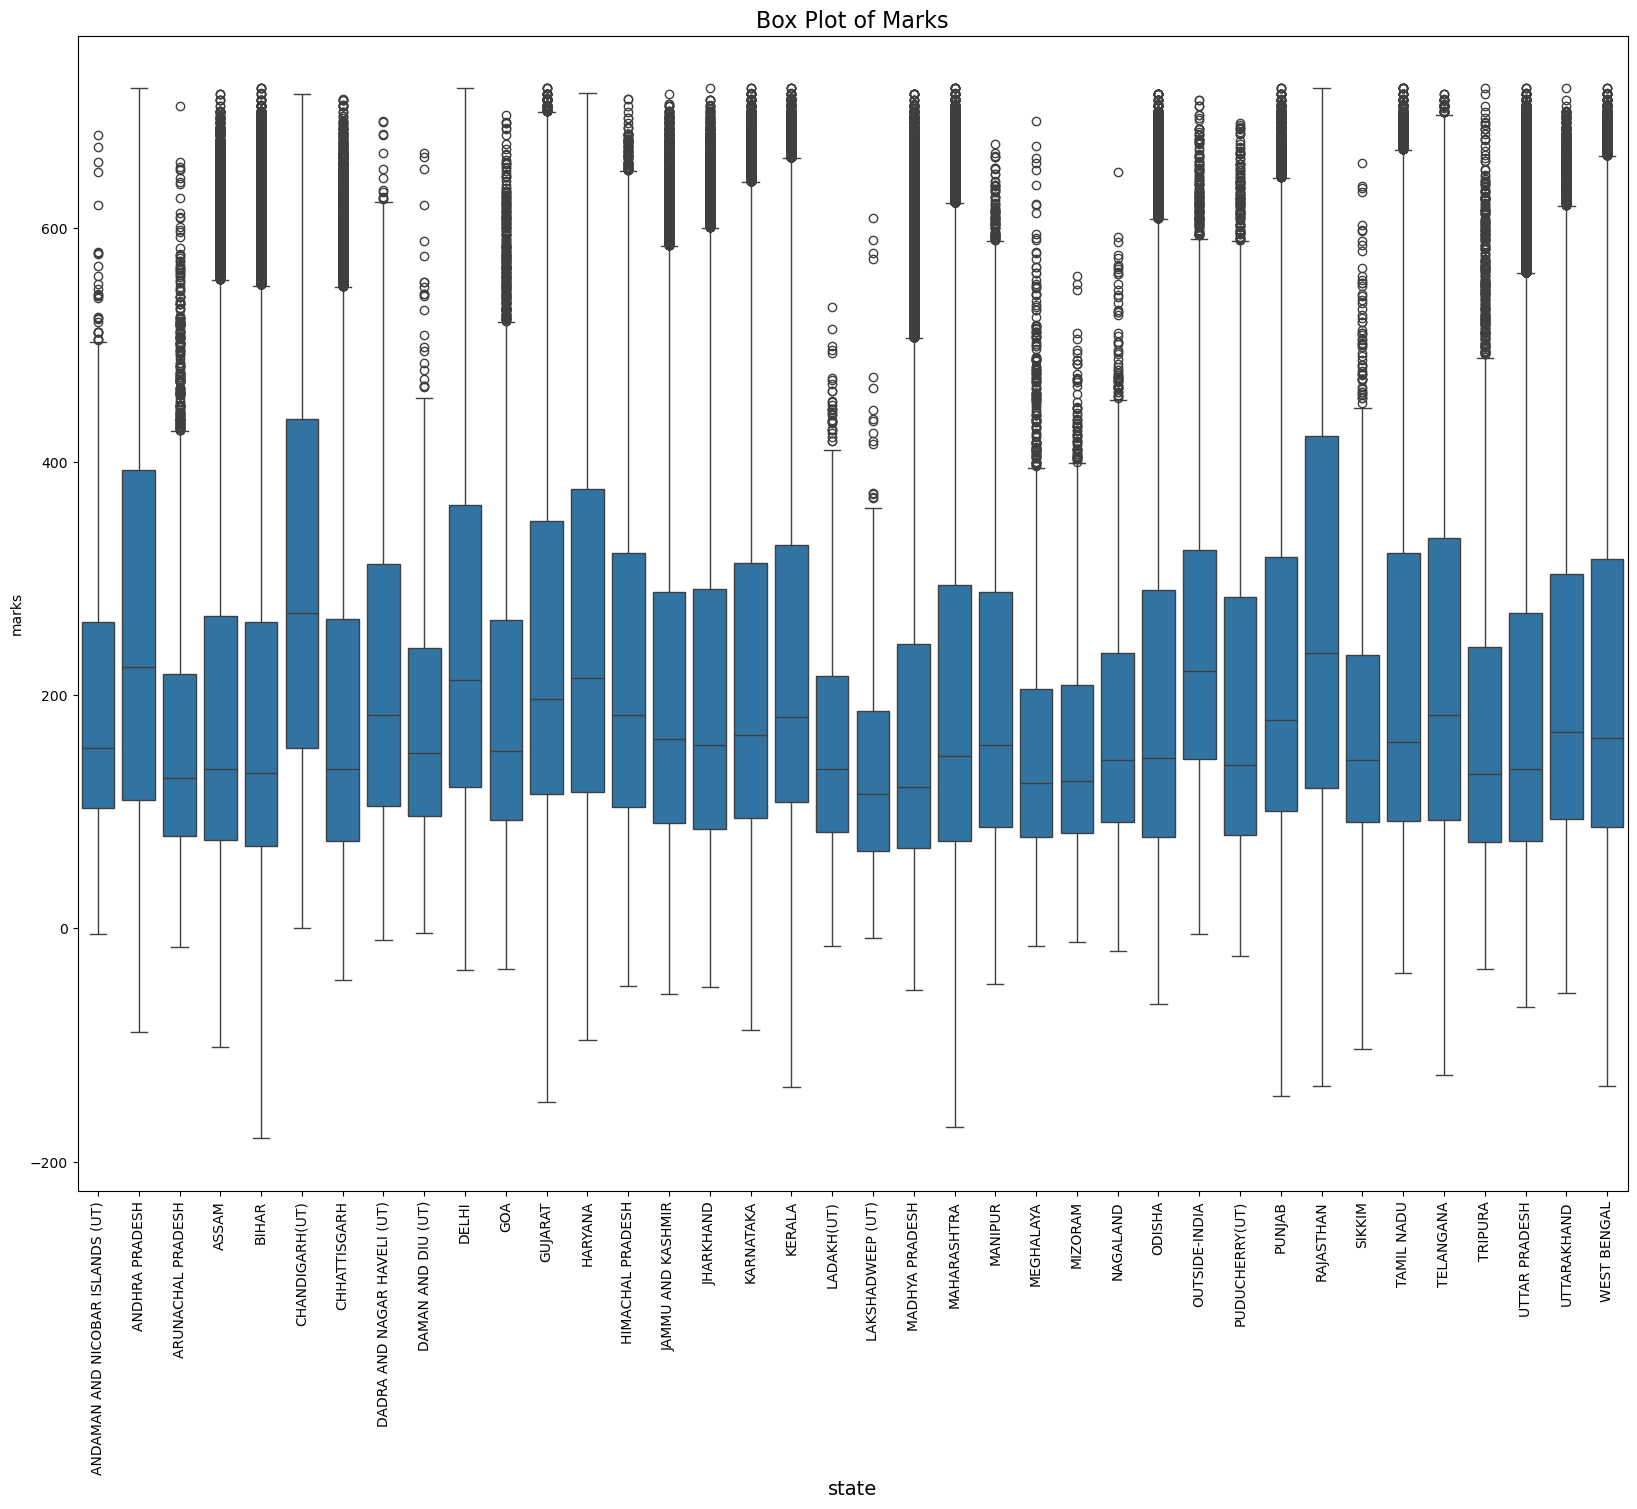

In [3]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'state',y = 'marks',data = df)

plt.title("Box Plot of Marks", fontsize=16)
plt.xticks(rotation = 90)
plt.xlabel("state", fontsize=14)
Q1 = df['marks'].quantile(0.25)
Q3 = df['marks'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['marks'] > upper_bound)]

num_outliers = outliers.shape[0]

print(f"The number of outliers in the 'marks' feature is: {num_outliers}")

## states having no outliers
- Andra Pradesh
- Haryana
- chandigarh
- Delhi
- Rajasthan

In [5]:

def calculate_iqr_limits_by_state(df, column_name, group_by_column):

    def calculate_stats(group):
        Q1 = group[column_name].quantile(0.25)
        Q3 = group[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        median_marks = group[column_name].median()
        return pd.Series({'IQR': IQR, 'Lower Limit': lower_limit, 'Upper Limit': upper_limit, 'Median Marks': median_marks})

    result = df.groupby(group_by_column).apply(calculate_stats).reset_index()
    return result

limits_by_state = calculate_iqr_limits_by_state(df, 'marks', 'state')
limits_by_state


C:\Users\gomes\AppData\Local\Temp\ipykernel_10236\2169887857.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(group_by_column).apply(calculate_stats).reset_index()


,state,IQR,Lower Limit,Upper Limit,Median Marks
0,ANDAMAN AND NICOBAR ISLANDS (UT),160.00,-137.000,503.000,155.0
1,ANDHRA PRADESH,283.00,-314.500,817.500,224.0
2,ARUNACHAL PRADESH,139.00,-129.500,426.500,129.0
3,ASSAM,192.00,-212.000,556.000,137.0
4,BIHAR,192.00,-217.000,551.000,133.0
5,CHANDIGARH(UT),282.00,-268.000,860.000,270.0
6,CHHATTISGARH,190.00,-210.000,550.000,137.0
7,DADRA AND NAGAR HAVELI (UT),207.50,-206.250,623.750,183.0
8,DAMAN AND DIU (UT),144.00,-120.000,456.000,150.0
9,DELHI,242.00,-242.000,726.000,213.0


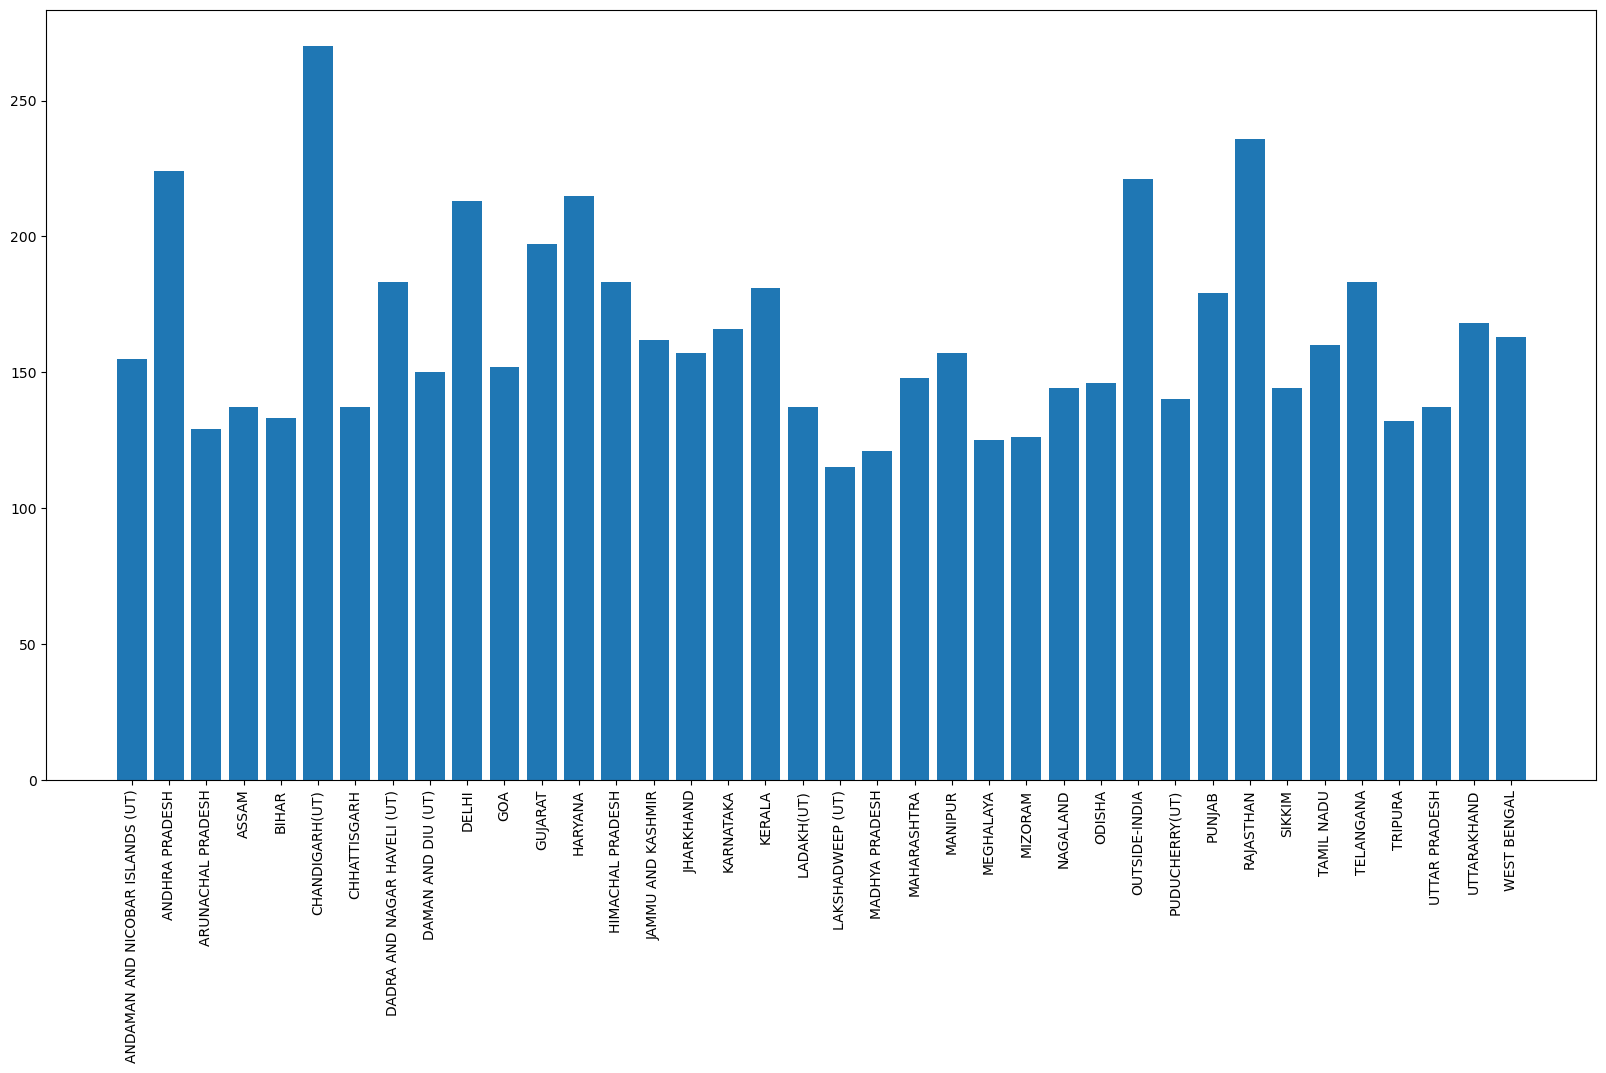

In [6]:
plt.figure(figsize = (20,10))
plt.bar(limits_by_state['state'],limits_by_state['Median Marks'])
plt.xticks(rotation = 90)
plt.show()

In [7]:
x1 = df.groupby(['state']).agg({'marks':'mean'}).reset_index()
x1[x1['marks'] > 230]


,state,marks
1,ANDHRA PRADESH,260.972385
5,CHANDIGARH(UT),304.816714
9,DELHI,256.136435
11,GUJARAT,245.138410
12,HARYANA,261.347332
17,KERALA,235.699838
27,OUTSIDE-INDIA,250.775789
30,RAJASTHAN,280.355462


In [8]:
y = df.groupby(['city','state']).agg({'marks':'mean'}).reset_index()
y1 = y[y['state'] == 'RAJASTHAN']
y1[y1['marks']>290]

,city,state,marks
94,BIKANER,RAJASTHAN,305.932804
251,JHUNJHUNU,RAJASTHAN,294.992934
300,KOTA,RAJASTHAN,306.987204
482,SIKAR,RAJASTHAN,362.076646


In [9]:
df[df['center_number']==392349]

,dummy_srlno,marks,state,city,center_name,center_number
1619022,3923490001,585,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
1619023,3923490002,572,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
1619024,3923490003,149,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
1619025,3923490004,476,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
1619026,3923490005,504,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
...,...,...,...,...,...,...
1620018,3923490997,466,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
1620019,3923490998,138,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
1620020,3923490999,482,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349
1620021,3923491000,428,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333120 entries, 0 to 2333119
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   dummy_srlno    int64 
 1   marks          int64 
 2   state          object
 3   city           object
 4   center_name    object
 5   center_number  int64 
dtypes: int64(3), object(3)
memory usage: 106.8+ MB


In [11]:
x = df[df['marks'] == 720]
x

,dummy_srlno,marks,state,city,center_name,center_number
12526,1203040201,720,ANDHRA PRADESH,NELLORE,PADMAVATHI VIDYALAYA SULLURPETA NELLORE AP,120304
18807,1205011150,720,ANDHRA PRADESH,VIJAYAWADA,POTTI SRIRAMULU CHALAVADI MALLIKARJUNA RAO COL...,120501
19977,1205030130,720,ANDHRA PRADESH,VIJAYAWADA,KAKARAPARTI BHAVANARAYANA COLLEGE,120503
21178,1205040383,720,ANDHRA PRADESH,VIJAYAWADA,DHANEKULA INSTITUTE OF ENGINEERING & TECHNOLOGY,120504
126179,1504020621,720,BIHAR,MADHUBANI,POLE STAR,150402
...,...,...,...,...,...,...
2153287,4408010959,720,UTTAR PRADESH,LUCKNOW,S.D.S.N. MAHAVIDYALAYA,440801
2201823,4502010321,720,UTTARAKHAND,HALDWANI,SRI GURU TEG BAHADUR SR. SEC. SCHOOL,450201
2260373,4608060485,720,WEST BENGAL,KOLKATA,RCC INSTITUTE OF INFORMATION TECHNOLOGY,460806
2279106,4615020497,720,WEST BENGAL,MURSHIDABAD,GUIDANCE FOUNDATION,461502


In [12]:
x1 = x.groupby(['state']).agg({'marks':'count'}).reset_index()
x1

,state,marks
0,ANDHRA PRADESH,4
1,BIHAR,4
2,DELHI,1
3,GUJARAT,4
4,JHARKHAND,1
5,KARNATAKA,3
6,KERALA,4
7,MAHARASHTRA,7
8,PUNJAB,4
9,RAJASTHAN,13


C:\Users\gomes\AppData\Local\Temp\ipykernel_10236\3555077934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'state', y= 'marks', data=x1, palette='Set2')


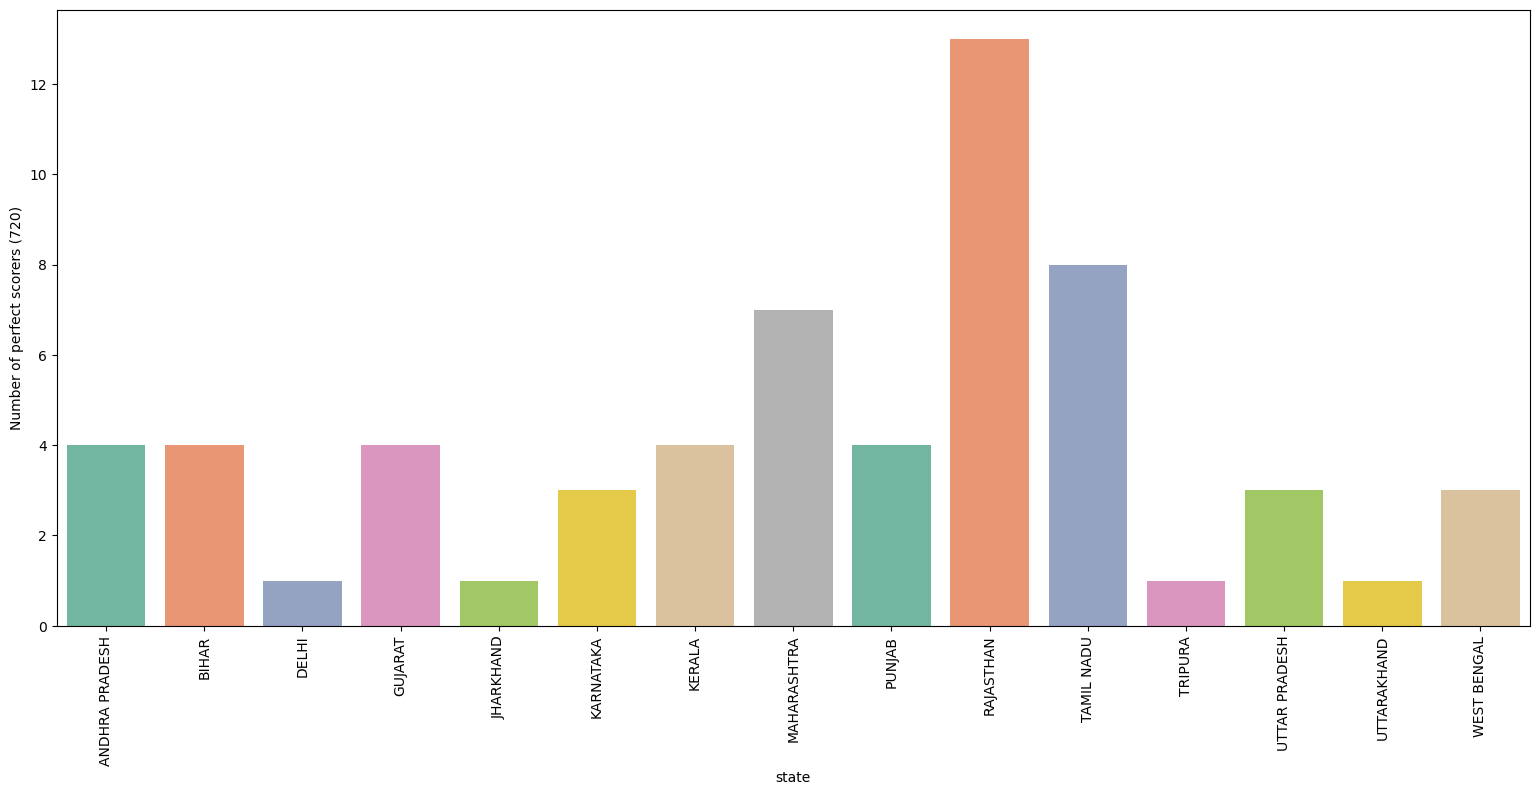

In [13]:
plt.figure(figsize = (19,8))
sns.barplot(x= 'state', y= 'marks', data=x1, palette='Set2')
plt.ylabel('Number of perfect scorers (720)')
plt.xticks(rotation=90)
plt.show()

In [14]:
rajasthan = df[(df['state'] == 'RAJASTHAN') & (df['marks'] == 720)]
rajasthan

,dummy_srlno,marks,state,city,center_name,center_number
1442285,3903010691,720,RAJASTHAN,JAIPUR,ALPHA INTERNATIONAL ACADEMY,390301
1442796,3903020433,720,RAJASTHAN,JAIPUR,UCCH MADHYMIK BALIKA ADARSH VIDHYA MANDIR,390302
1454691,3918040429,720,RAJASTHAN,JHUNJHUNU,SETH G B PODAR COLLEGE NAWALGARH,391804
1473150,3905130490,720,RAJASTHAN,KOTA,KAUTILYA SR. SEC. SCHOOL,390513
1479895,3905270165,720,RAJASTHAN,KOTA,DECENT SCHOOL,390527
1492528,3906010459,720,RAJASTHAN,UDAIPUR,ST. ANTHONYS SR. SEC. SCHOOL,390601
1534859,3903190322,720,RAJASTHAN,JAIPUR,SHRI MAHESHWARI SR. SEC. SCHOOL,390319
1539846,3903250344,720,RAJASTHAN,JAIPUR,TAGORE INTERNATIONAL SCHOOL,390325
1541626,3903270649,720,RAJASTHAN,JAIPUR,D.C.S INTERNATIONAL SCHOOL,390327
1617593,3923440212,720,RAJASTHAN,SIKAR,SARASWATI PUBLIC SCHOOL,392344


In [15]:
x.groupby(['center_name']).agg({'marks': 'count'})

,marks
center_name,
ALPHA INTERNATIONAL ACADEMY,1
BHAVANS BHAGWANDAS PUROHIT VIDYA MANDIR,1
CHINMAYA VIDYALAYA VADUTHALA,1
D.A.V SCHOOL,1
D.C.S INTERNATIONAL SCHOOL,1
DAV PUBLIC SCHOOL,1
DAV PUBLIC SCHOOL NERUL,1
DECENT SCHOOL,1
DHANEKULA INSTITUTE OF ENGINEERING & TECHNOLOGY,1


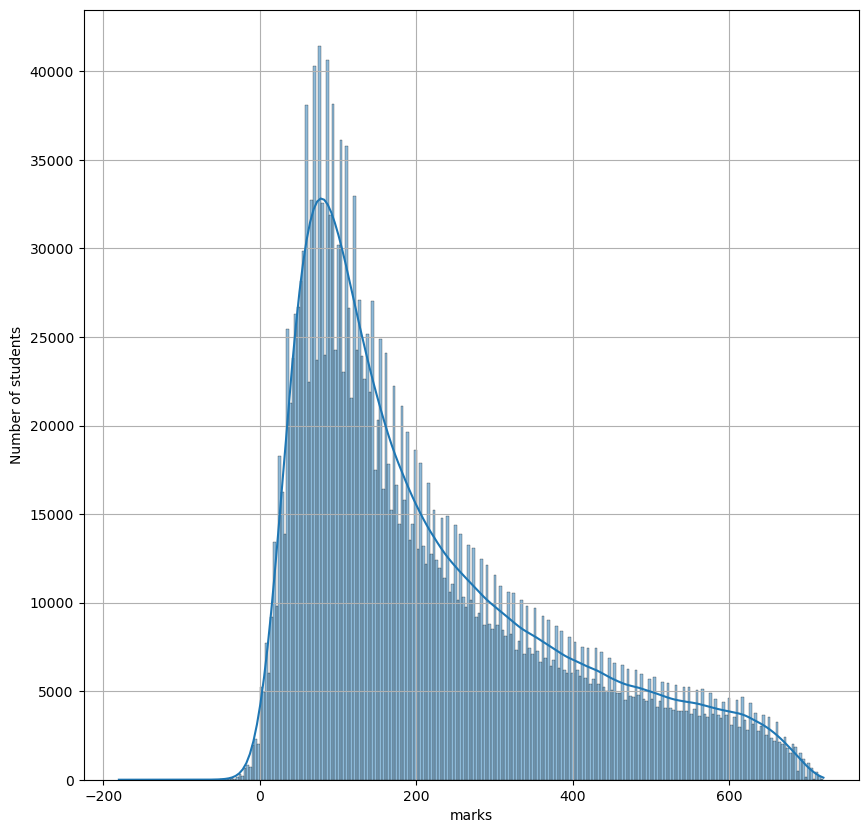

Kurtosis Marks = 0.054919403645733667
Skewness Marks = 0.9830144180232898


In [16]:
y = df['marks']
plt.figure(figsize = (10,10))
sns.histplot(y,edgecolor = 'black',kde = True)
plt.grid(True)
plt.ylabel('Number of students')
plt.show()
print('Kurtosis Marks =',sp.kurtosis(y))
print('Skewness Marks =',sp.skew(y))

## The data is highly right right skewed but the distribution is normal at the same time close to normal distribution but extreme values can be found in the right side as it is rightly skewed

In [18]:
north_india = ['JAMMU AND KASHMIR (UT)', 'HIMACHAL PRADESH', 'PUNJAB', 'UTTARAKHAND', 'HARYANA', 'DELHI', 'UTTAR PRADESH', 'CHANDIGARH']
west_india = ['RAJASTHAN', 'GUJARAT', 'MAHARASHTRA', 'GOA']
east_india = ['BIHAR', 'WEST BENGAL', 'ODISHA', 'JHARKHAND', 'SIKKIM']
south_india = ['TAMIL NADU', 'KARNATAKA', 'KERALA', 'ANDHRA PRADESH', 'TELANGANA', 'PUDUCHERRY']

In [19]:
def get_region(state):
    if state in north_india:
        return 'North'
    elif state in west_india:
        return 'West'
    elif state in east_india:
        return 'East'
    elif state in south_india:
        return 'South'
    else:
        return 'Union Territory'

df['region'] = df['state'].apply(get_region)

In [20]:
df

,dummy_srlno,marks,state,city,center_name,center_number,region
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
...,...,...,...,...,...,...,...
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East
2333116,4613120136,102,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East
2333117,4613120137,14,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East
2333118,4613120138,179,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East


In [21]:
df.groupby(['region']).agg({'marks':'mean'})

,marks
region,
East,203.594841
North,212.016740
South,228.513383
Union Territory,186.469124
West,235.796670


## The west side has the maminum average marks among all regions.
-  West includes - Rajasthan, 'Gujarat','Maharastra', 'Goa'.
-  the state Rajasthan spikes the average marks of the west region by 23 marks.

In [23]:
df[(df['state'] == 'RAJASTHAN') & (df['marks'] == 720) & (df['city'] == 'JAIPUR')]
df

,dummy_srlno,marks,state,city,center_name,center_number,region
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
...,...,...,...,...,...,...,...
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East
2333116,4613120136,102,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East
2333117,4613120137,14,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East
2333118,4613120138,179,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East


In [24]:
x2 = x.groupby(['city']).agg({'marks': 'count'}).reset_index()

C:\Users\gomes\AppData\Local\Temp\ipykernel_10236\3484309281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'city', y= 'marks', data=x2, palette='Set2')


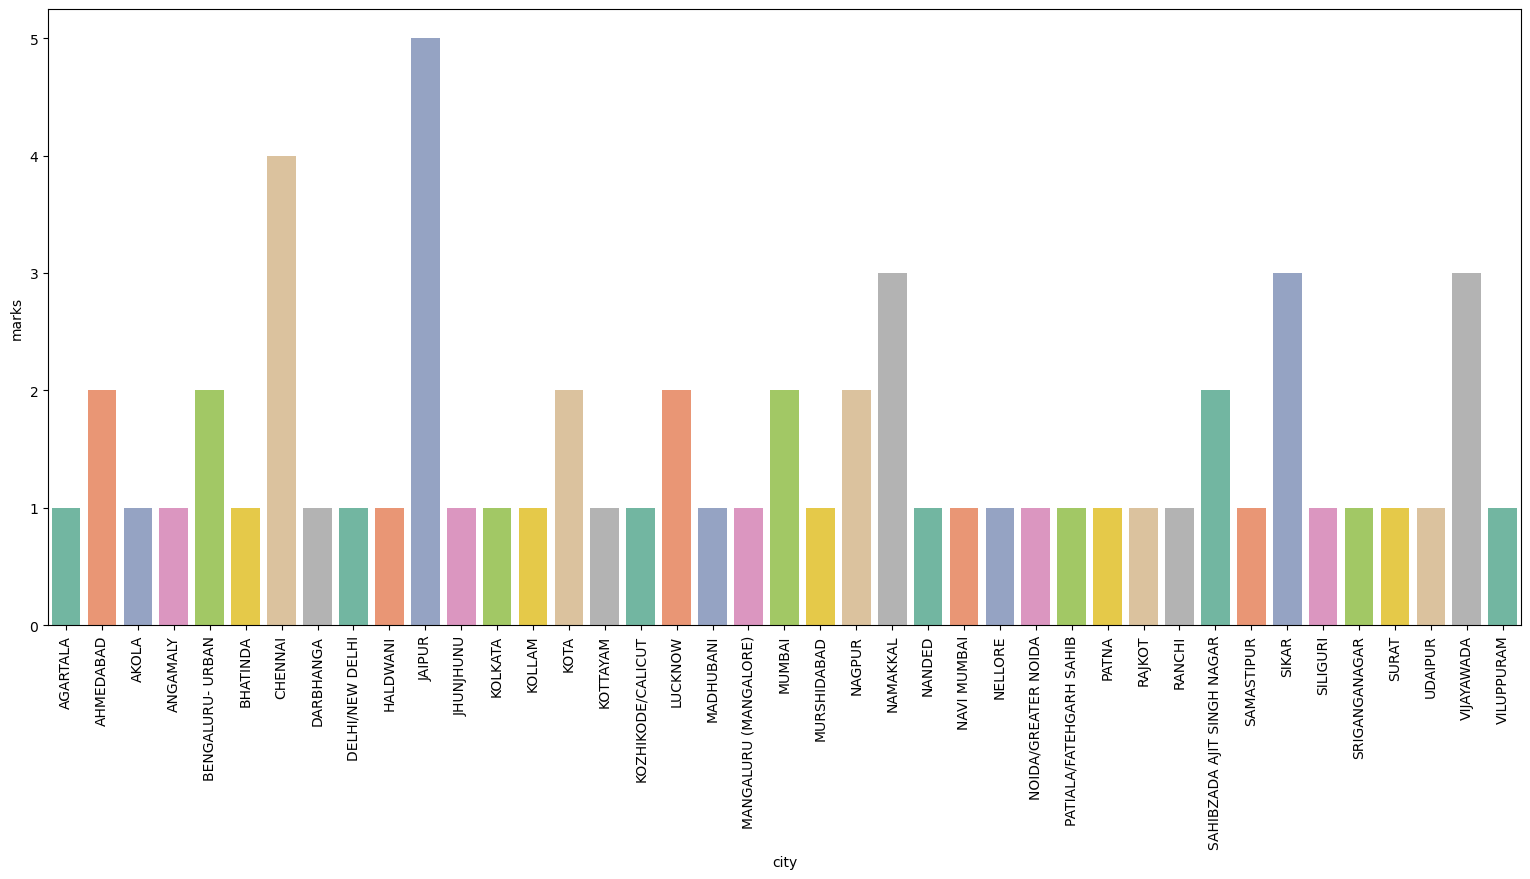

In [25]:
plt.figure(figsize = (19,8))
sns.barplot(x= 'city', y= 'marks', data=x2, palette='Set2')
plt.xticks(rotation=90)
plt.show()

## In Rajasthan maximum number of perfect scores are recorded in Jaipur - 5
## In Tamin Nadu maximum number of perfect scores are recorded in Jaipur - 4

In [27]:
more_than_700 = df[df['marks'] >650]
more_than_700

,dummy_srlno,marks,state,city,center_name,center_number,region
55,1101010056,680,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
635,1101020175,657,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,110102,Union Territory
912,1101020452,670,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,110102,Union Territory
1053,1201010029,656,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101,South
1055,1201010031,656,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101,South
...,...,...,...,...,...,...,...
2332619,4613100091,669,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310,East
2332671,4613100143,666,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310,East
2332696,4613100168,662,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310,East
2333052,4613120072,675,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East


In [28]:
x3 = more_than_700.groupby(['city']).agg({'marks':'count'}).reset_index()
x3

,city,marks
0,ABU DHABI,7
1,AGARTALA,20
2,AGRA,148
3,AHMEDABAD,264
4,AHMEDNAGAR,24
...,...,...
505,WASHIM,15
506,WAYANAD,49
507,YADGIR,2
508,YAMUNA NAGAR,17


In [29]:
x3 [x3 ['marks'] >500]

,city,marks
63,BENGALURU- URBAN,504
127,DELHI/NEW DELHI,1274
213,JAIPUR,1613
270,KOTA,1033
272,KOTTAYAM,529
371,PATNA,717
436,SIKAR,1937


In [30]:
x3 [x3 ['city']  == 'SIKAR']

,city,marks
436,SIKAR,1937


In [31]:
x3 [x3 ['city']  == 'JAIPUR']

,city,marks
213,JAIPUR,1613


In [32]:
x3 [x3 ['city']  == 'DELHI/NEW DELHI']

,city,marks
127,DELHI/NEW DELHI,1274


In [33]:
x3 [x3 ['city']  == 'KOTA']

,city,marks
270,KOTA,1033


## Sikar(City in Rajasthan),Jaipur and New Delhi  has recorded unusual the Maximum number of students having marks more than 700 students

In [35]:
more_than_650_Sikar = df[(df['marks'] >650) & (df['city'] == 'SIKAR')]
more_than_650_Sikar

,dummy_srlno,marks,state,city,center_name,center_number,region
1467737,3923010011,655,RAJASTHAN,SIKAR,BHARTIYA INSTITUTE OF ENGINEERING AND TECHNOLOGY,392301,West
1467743,3923010017,662,RAJASTHAN,SIKAR,BHARTIYA INSTITUTE OF ENGINEERING AND TECHNOLOGY,392301,West
1467747,3923010021,681,RAJASTHAN,SIKAR,BHARTIYA INSTITUTE OF ENGINEERING AND TECHNOLOGY,392301,West
1467763,3923010037,661,RAJASTHAN,SIKAR,BHARTIYA INSTITUTE OF ENGINEERING AND TECHNOLOGY,392301,West
1467780,3923010054,658,RAJASTHAN,SIKAR,BHARTIYA INSTITUTE OF ENGINEERING AND TECHNOLOGY,392301,West
...,...,...,...,...,...,...,...
1619968,3923490947,662,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349,West
1619971,3923490950,715,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349,West
1619983,3923490962,666,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349,West
1620005,3923490984,665,RAJASTHAN,SIKAR,VIDYA BHARATI PUBLIC SCHOOL,392349,West


In [36]:
x4 = more_than_650_Sikar.groupby(['center_name']).agg({'marks': 'count'}).reset_index()
x4[x4['marks'] > 30]

,center_name,marks
0,ARAVALI PUBLIC SCHOOL,45
1,ARYAN PG COLLEGE,39
6,BHARTIYA INSTITUTE OF ENGINEERING AND TECHNOLOGY,34
7,BHARTIYA MAHILA P.G. MAHAVIDYALAYA,35
9,BPS CONVENT SCHOOL,46
11,D.A.V. PUBLIC SHIKSHAN SANSTHAN SR. SEC. SCHOOL,46
12,DANTA MAHAVIDHALAYA,39
13,GOENKA PUBLIC SCHOOL,38
14,GURUKUL INTERNATIONAL SCHOOL,62
15,KENDRIYA VIDYALAYA SIKAR,37


## These Schools in the city of Sikar has recorded the highest number of candidates scoring marks more than 650 from each center around 60 students have scored marks more than 650

In [38]:
more_than_650_jaipur = df[(df['marks'] >650) & (df['city'] == 'JAIPUR')]
more_than_650_jaipur

,dummy_srlno,marks,state,city,center_name,center_number,region
1441617,3903010023,681,RAJASTHAN,JAIPUR,ALPHA INTERNATIONAL ACADEMY,390301,West
1441622,3903010028,660,RAJASTHAN,JAIPUR,ALPHA INTERNATIONAL ACADEMY,390301,West
1441642,3903010048,657,RAJASTHAN,JAIPUR,ALPHA INTERNATIONAL ACADEMY,390301,West
1441661,3903010067,691,RAJASTHAN,JAIPUR,ALPHA INTERNATIONAL ACADEMY,390301,West
1441685,3903010091,695,RAJASTHAN,JAIPUR,ALPHA INTERNATIONAL ACADEMY,390301,West
...,...,...,...,...,...,...,...
1575541,3903860074,665,RAJASTHAN,JAIPUR,BLUE HEAVEN VIDYALAYA MANSAROVAR,390386,West
1575545,3903860078,669,RAJASTHAN,JAIPUR,BLUE HEAVEN VIDYALAYA MANSAROVAR,390386,West
1575574,3903860107,652,RAJASTHAN,JAIPUR,BLUE HEAVEN VIDYALAYA MANSAROVAR,390386,West
1575626,3903860159,660,RAJASTHAN,JAIPUR,BLUE HEAVEN VIDYALAYA MANSAROVAR,390386,West


In [39]:
x5 = more_than_650_jaipur.groupby(['center_name']).agg({'marks': 'count'}).reset_index()
x5[x5['marks'] > 45]

,center_name,marks
34,MAHESHWARI PUBLIC SCHOOL,53
74,TAGORE PUBLIC SCHOOL,63


In [40]:
new_df = df.groupby(['center_name','city','state']).agg({'center_number':'count',
                                          'marks':'mean',}).reset_index()
new_df = new_df.rename(columns = {'center_number':'number of students appeared','marks':'average marks'})
new_df

,center_name,city,state,number of students appeared,average marks
0,"(UNIT-2) SCHOOL OF ENGINEERING, R.K.UNIVERSITY",RAJKOT,GUJARAT,973,323.129496
1,A G PUBLLIC SCHOOL,KOLLAM,KERALA,344,191.613372
2,A M N M MODEL SCHOOL CHETGANJ VARANASI UP,VARANASI,UTTAR PRADESH,944,226.693856
3,A N COLLEGE,PATNA,BIHAR,1746,225.987400
4,A V K COLLEGE FOR WOMEN,HASSAN,KARNATAKA,356,197.339888
...,...,...,...,...,...
4710,ZENITH INTERNATIONAL SCHOOL,KENDRAPARA,ODISHA,237,164.139241
4711,ZENITH CONVENT SCHOOL,GORAKHPUR,UTTAR PRADESH,469,213.375267
4712,ZILLA PUBLIC SCHOOL,PURBA MEDINIPUR,WEST BENGAL,472,157.531780
4713,ZULAL BHILAJIRAO PATIL COLLEGE ( JAI HIND SENI...,DHULE,MAHARASHTRA,402,151.248756


<Axes: xlabel='average marks', ylabel='Count'>

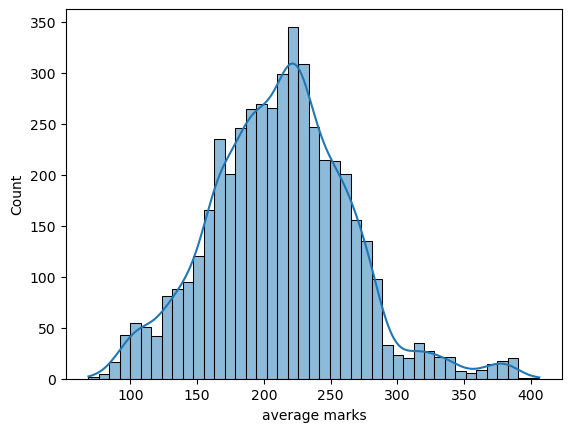

In [41]:
sns.histplot(new_df['average marks'],kde = True,edgecolor = 'black')

In [42]:
x6 = df.groupby(['center_name','city']).agg({'marks':'count'}).reset_index()
x6

,center_name,city,marks
0,"(UNIT-2) SCHOOL OF ENGINEERING, R.K.UNIVERSITY",RAJKOT,973
1,A G PUBLLIC SCHOOL,KOLLAM,344
2,A M N M MODEL SCHOOL CHETGANJ VARANASI UP,VARANASI,944
3,A N COLLEGE,PATNA,1746
4,A V K COLLEGE FOR WOMEN,HASSAN,356
...,...,...,...
4710,ZENITH INTERNATIONAL SCHOOL,KENDRAPARA,237
4711,ZENITH CONVENT SCHOOL,GORAKHPUR,469
4712,ZILLA PUBLIC SCHOOL,PURBA MEDINIPUR,472
4713,ZULAL BHILAJIRAO PATIL COLLEGE ( JAI HIND SENI...,DHULE,402


In [43]:
total_candidates = df.groupby(['center_number', 'center_name']).size().reset_index(name='total_candidates')

# Filter dataframes for different mark thresholds
filtered_df_2 = df[df['marks'] > 623]
filtered_df_3 = df[df['marks'] > 700]

# Group by center details and count high scorers for marks > 623
high_scorers_623 = filtered_df_2.groupby(['center_number', 'center_name', 'state', 'city']).size().reset_index(name='high_scorers_623')

# Group by center details and count high scorers for marks > 700
high_scorers_700 = filtered_df_3.groupby(['center_number', 'center_name', 'state', 'city']).size().reset_index(name='high_scorers_700')

# Merge the total_candidates dataframe with high_scorers_623 and high_scorers_700 dataframes
result_df = pd.merge(total_candidates, high_scorers_623, on=['center_number', 'center_name'], how='left')
result_df = pd.merge(result_df, high_scorers_700, on=['center_number', 'center_name', 'state', 'city'], how='left')

# Fill NaNs with 0 and convert to integers
result_df['high_scorers_623'] = result_df['high_scorers_623'].fillna(0).astype(int)
result_df['high_scorers_700'] = result_df['high_scorers_700'].fillna(0).astype(int)

# Calculate success rate
result_df['Success rate'] = result_df['high_scorers_623'] / result_df['total_candidates'] * 100

# Display the result dataframe
result_df


,center_number,center_name,total_candidates,state,city,high_scorers_623,high_scorers_700,Success rate
0,110101,KENDRIYA VIDYALAYA NO. 1,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,1,0,0.216920
1,110102,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,461,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,2,0,0.433839
2,110103,GOVERNMENT MODEL SENIOR SECONDARY SCHOOL,103,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,1,0,0.970874
3,120101,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,701,ANDHRA PRADESH,GUNTUR,24,0,3.423680
4,120102,CHALAPATHI INSTITUTE OF TECHNOLOGY,586,ANDHRA PRADESH,GUNTUR,13,0,2.218430
...,...,...,...,...,...,...,...,...
4745,991001,THE INDIAN SCHOOL,229,OUTSIDE-INDIA,MANAMA,4,0,1.746725
4746,991101,INDIAN SCHOOL MUSCAT,312,OUTSIDE-INDIA,MUSCAT,3,0,0.961538
4747,991201,INTERNATIONAL INDIAN SCHOOL,554,OUTSIDE-INDIA,RIYADH,4,0,0.722022
4748,991301,SHARJAH INDIAN SCHOOL,753,OUTSIDE-INDIA,SHARJAH,11,0,1.460823


In [44]:
result_df['Success rate'].mean()

2.2196091572833874

In [45]:
print('Mean high_scorers_623 =',result_df['high_scorers_623'].mean())
print('Mean high_scorers_700 =',result_df['high_scorers_700'].mean())

Mean high_scorers_623 = 11.531578947368422
Mean high_scorers_700 = 0.34421052631578947


In [46]:
result_df_2 = result_df[(result_df['Success rate']> 6.4)]
result_df_2 = result_df_2.rename(columns = {'high_scorers':'high_scorers_623'})
result_df_2

,center_number,center_name,total_candidates,state,city,high_scorers_623,high_scorers_700,Success rate
38,120507,VIKAS GROUP OF INSTITUTIONS,614,ANDHRA PRADESH,VIJAYAWADA,42,3,6.840391
40,120509,ANDHRA LOYOLA INSTITUTE OF ENGINEERING AND TEC...,572,ANDHRA PRADESH,VIJAYAWADA,37,2,6.468531
121,122801,SREE MULLAPUDI VENKATARAYA MEMORIAL POLYTECHNIC,404,ANDHRA PRADESH,TANUKU,31,1,7.673267
122,122802,SREE RAMA INSTITUTE OF MANAGEMENT ( MBA),214,ANDHRA PRADESH,TANUKU,25,1,11.682243
468,160103,GOVT. MODEL SENIOR SECONDARY SCHOOL,704,CHANDIGARH(UT),CHANDIGARH/MOHALI,48,4,6.818182
...,...,...,...,...,...,...,...,...
4554,460605,BANTRA M.S.P.C HIGH SCHOOL,588,WEST BENGAL,HOWRAH,38,1,6.462585
4555,460606,SEACOM ENGINEERING COLLEGE,536,WEST BENGAL,HOWRAH,48,1,8.955224
4557,460608,DIVINE MERCY SCHOOL,470,WEST BENGAL,HOWRAH,41,1,8.723404
4558,460609,KENDRIYA VIDYALAYA SANTRAGACHI,471,WEST BENGAL,HOWRAH,41,1,8.704883


In [47]:
result_df_2.to_csv('suspected_centers.csv')

In [48]:
result_df[result_df['center_name'] == 'UNIT-1 SCHOOL OF ENGINEERING R.K.UNIVERSITY']

,center_number,center_name,total_candidates,state,city,high_scorers_623,high_scorers_700,Success rate
758,220701,UNIT-1 SCHOOL OF ENGINEERING R.K.UNIVERSITY,1968,GUJARAT,RAJKOT,175,9,8.892276


In [49]:
result_df_filtered = result_df[result_df['Success rate'] <= 6.4]
max(result_df_filtered['Success rate'])

6.397306397306397

In [50]:
result_df_filtered.to_csv('Non suspected centers.csv')

In [51]:
min(result_df_2['Success rate'])

6.4128256513026045

In [52]:
result_df.to_csv('new neet data.csv')

In [53]:
result_df_2[result_df_2['total_candidates'] == 1001]

,center_number,center_name,total_candidates,state,city,high_scorers_623,high_scorers_700,Success rate
3409,392349,VIDYA BHARATI PUBLIC SCHOOL,1001,RAJASTHAN,SIKAR,112,8,11.188811


In [54]:
selected_students = df[df['marks']>623]
selected_students

,dummy_srlno,marks,state,city,center_name,center_number,region
55,1101010056,680,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101,Union Territory
635,1101020175,657,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,110102,Union Territory
912,1101020452,670,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,110102,Union Territory
981,1101030060,648,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,GOVERNMENT MODEL SENIOR SECONDARY SCHOOL,110103,Union Territory
1053,1201010029,656,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101,South
...,...,...,...,...,...,...,...
2332671,4613100143,666,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310,East
2332696,4613100168,662,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310,East
2332697,4613100169,634,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310,East
2333052,4613120072,675,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312,East


In [55]:
selected_students_centerwise = selected_students.groupby(['center_number','center_name','state','city']).agg({'marks':'count'}).reset_index()
selected_students_centerwise

,center_number,center_name,state,city,marks
0,110101,KENDRIYA VIDYALAYA NO. 1,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,1
1,110102,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,2
2,110103,GOVERNMENT MODEL SENIOR SECONDARY SCHOOL,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,1
3,120101,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,ANDHRA PRADESH,GUNTUR,24
4,120102,CHALAPATHI INSTITUTE OF TECHNOLOGY,ANDHRA PRADESH,GUNTUR,13
...,...,...,...,...,...
4371,990801,"GLOBAL INDIAN INTERNATIONAL SCHOOL, KUALALUMPU...",OUTSIDE-INDIA,KUALA LUMPUR,1
4372,991001,THE INDIAN SCHOOL,OUTSIDE-INDIA,MANAMA,4
4373,991101,INDIAN SCHOOL MUSCAT,OUTSIDE-INDIA,MUSCAT,3
4374,991201,INTERNATIONAL INDIAN SCHOOL,OUTSIDE-INDIA,RIYADH,4


In [56]:
55000/2333120*100

2.3573583870525305

In [57]:
mean = result_df['Success rate'].mean()
std = result_df['Success rate'].std()
t = mean + 2*std
print(t)

6.401823387946588


In [67]:
df_x = df[df['marks']]
x

,marks
state,
ANDAMAN AND NICOBAR ISLANDS (UT),192.737561
ANDHRA PRADESH,260.972385
ARUNACHAL PRADESH,162.896942
ASSAM,190.940459
BIHAR,188.583585
CHANDIGARH(UT),304.816714
CHHATTISGARH,185.636084
DADRA AND NAGAR HAVELI (UT),221.932063
DAMAN AND DIU (UT),180.239272


In [75]:
cutoff = 163

# Filter the data for qualified candidates
qualified_candidates = df[df['marks'] >= cutoff]

# Group by state to count qualified and total candidates
total_candidates_by_state = df.groupby('state').size()
qualified_candidates_by_state = qualified_candidates.groupby('state').size()

# Calculate success percentage
success_percentage_by_state = (qualified_candidates_by_state / total_candidates_by_state) * 100

# Create a DataFrame with the results
results = pd.DataFrame({
    'total_candidates': total_candidates_by_state,
    'qualified_candidates': qualified_candidates_by_state,
    'success_percentage': success_percentage_by_state
}).reset_index()

results.fillna(0, inplace=True)  # Fill NaN values with 0

results


,state,total_candidates,qualified_candidates,success_percentage
0,ANDAMAN AND NICOBAR ISLANDS (UT),1025,491,47.902439
1,ANDHRA PRADESH,63842,39071,61.199524
2,ARUNACHAL PRADESH,4774,1802,37.746125
3,ASSAM,44272,19039,43.004608
4,BIHAR,136191,57342,42.104104
5,CHANDIGARH(UT),3530,2582,73.144476
6,CHHATTISGARH,44241,19200,43.398657
7,DADRA AND NAGAR HAVELI (UT),1207,655,54.266777
8,DAMAN AND DIU (UT),769,345,44.863459
9,DELHI,66090,41476,62.756847


<Axes: xlabel='success_percentage', ylabel='Count'>

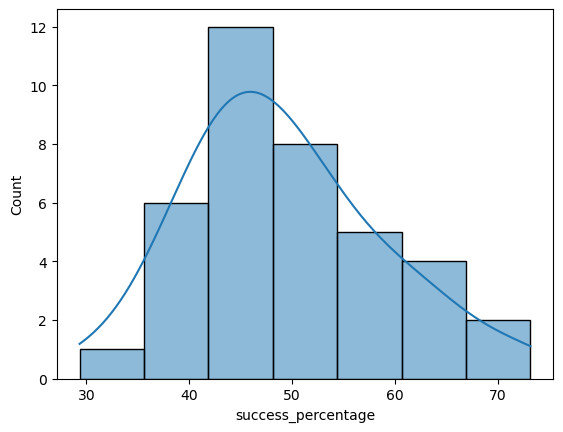

In [85]:
sns.histplot(results['success_percentage'],kde = True)

In [73]:
df[df['marks']>163]

,dummy_srlno,marks,state,city,center_name,center_number
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
5,1101010006,181,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
...,...,...,...,...,...,...
2333106,4613120126,592,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333108,4613120128,233,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333111,4613120131,250,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


In [89]:
df[df['marks']>623]

,dummy_srlno,marks,state,city,center_name,center_number
55,1101010056,680,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
635,1101020175,657,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,110102
912,1101020452,670,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY,110102
981,1101030060,648,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,GOVERNMENT MODEL SENIOR SECONDARY SCHOOL,110103
1053,1201010029,656,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
...,...,...,...,...,...,...
2332671,4613100143,666,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310
2332696,4613100168,662,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310
2332697,4613100169,634,WEST BENGAL,KALYANI,KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SC...,461310
2333052,4613120072,675,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


In [93]:
cutoff = 163

# Filter the data for qualified candidates
qualified_candidates = df[df['marks'] >= cutoff]

# Group by state to count qualified and total candidates
total_candidates_by_state = df.groupby('state').size()
qualified_candidates_by_state = qualified_candidates.groupby('state').size()

# Calculate success percentage
success_percentage_by_state = (qualified_candidates_by_state / total_candidates_by_state) * 100

# Create a DataFrame with the results
results = pd.DataFrame({
    'total_candidates': total_candidates_by_state,
    'qualified_candidates': qualified_candidates_by_state,
    'success_percentage': success_percentage_by_state
}).reset_index()

results.fillna(0, inplace=True)  # Fill NaN values with 0

# Sort the DataFrame by the number of qualified candidates in descending order
results = results.sort_values(by='qualified_candidates', ascending=False)
results


,state,total_candidates,qualified_candidates,success_percentage
35,UTTAR PRADESH,332626,144349,43.396788
21,MAHARASHTRA,275245,128016,46.509837
30,RAJASTHAN,193129,124234,64.326952
16,KARNATAKA,150894,77047,51.060347
17,KERALA,138545,76977,55.561009
32,TAMIL NADU,153702,75713,49.259606
37,WEST BENGAL,117320,58687,50.023014
4,BIHAR,136191,57342,42.104104
11,GUJARAT,86952,51426,59.142975
20,MADHYA PRADESH,130238,50515,38.786683
